In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
sw_indo = stopwords.words("indonesian")+ list(punctuation)

# Import Dataset

sumber dataset: Rahmi, F. and Wibisono, Y. 2016. aplikasi SMS spam filtering pada android menggunakan naive bayes, unpublished

data telah dimodifikasi
data terdiri dari kolom teks dan label
* 569 data sms normal (label 0)
* 574 data sms spam, fraud atau penipuan (label 1)

In [4]:
df = pd.read_csv("not_imbalance_5000row_tanggal3.csv", index_col='Unnamed: 0')
df.head()

,rating,teks_setelah_prep
0,1,flashdisk pakai isi file file nya baca kosong isi
1,1,saking bagus minggu pakai flashdisk nya detect...
2,1,alhamdulillah laptop terima kondisi normal
3,1,barang sesuai pesan pesan pesan tipe beda tipe
4,1,kapasitas format hapus file hati garansi


In [13]:
df.shape

(4967, 2)

# Dataset Spliting

In [5]:
df.rating.value_counts()

1    1000
2    1000
3    1000
4    1000
5    1000
Name: rating, dtype: int64

In [6]:
df.isna().sum()

rating                0
teks_setelah_prep    33
dtype: int64

In [7]:
df.dropna(axis=0,inplace= True)

In [8]:
df.isna().sum()

rating               0
teks_setelah_prep    0
dtype: int64

In [22]:
X = df.teks_setelah_prep
y= df.rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y , random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3476,), (1491,), (3476,), (1491,))

# Training
* kita gak perlu tahapan preprocessing seperti scaling atau data kategorik atau numerik, dkk
** karena preprocessing kita udah di dalam tfidf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from jcopml.tuning import random_search_params as rsp

In [14]:
# from sklearn.decomposition import PCA

In [15]:
# import pickle

In [16]:
# tfidf=pickle.load(open("/content/tfidf_tanggal3.pkl","rb")) #rb= read binary`b

In [19]:
# X=tfidf.toarray()

In [20]:
# pca = PCA()
# pca.fit(X)

PCA()

Text(0, 0.5, 'cumulative explained variance')

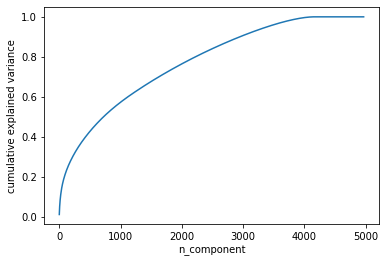

In [21]:
# plt.plot(pca.explained_variance_ratio_.cumsum())
# plt.xlabel("n_component")
# plt.ylabel("cumulative explained variance")

In [24]:
pipeline = Pipeline([
    ("prep", TfidfVectorizer(tokenizer=word_tokenize, stop_words=sw_indo, ngram_range=(1, 1))),
    ("algo", RandomForestClassifier())
])
model = RandomizedSearchCV(pipeline,rsp.rf_params,n_iter=50,n_jobs=4,cv= 3,verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  % sorted(inconsistent)


{'algo__max_depth': 79, 'algo__max_features': 0.2611028314150276, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 160}
0.9470655926352128 0.4338269297922743 0.47753185781354796


In [30]:
text = ["sayang pengiriman agak lambat"]
model.predict(text)

array([3])

In [32]:
text = ["Standar lah. Proses si agak mundur sehari padahal pagi go send"]
model.predict(text)

array([2])

In [33]:
pickle.dump(model, open("model_lumayan_bagus.pkl", "wb")) #wb= write binary

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
pipeline = Pipeline([

    ("algo", SVC())
])
model = RandomizedSearchCV(pipeline,rsp.svm_params,n_iter=50,n_jobs=4,cv= 3,verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train,y_train),model.best_score_,model.score(X_test,y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__C': 767.8712708499261, 'algo__gamma': 0.021137007490475684}
0.9719298245614035 0.39122807017543854 0.34285714285714286


In [ ]:
text = ['barang nya jelek amat, paket yang dikirim gak sesuai pesanan']
model.predict(text)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored